In [117]:
import pandas as pd
import os
import bs4 
from bs4 import BeautifulSoup
from lxml import etree # lxml is imported for xpath examples

from pathlib import Path
import requests
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
import math
import numpy as np

# Visualisation dependencies
import matplotlib.pyplot as plt
import textwrap
import networkx as nx
from pyvis.network import Network as net
from copy import deepcopy
from community import community_louvain

import warnings
warnings.filterwarnings('ignore')


import warnings
warnings.filterwarnings('ignore')

import uuid
import glob

from datetime import datetime
import chardet
import random
import re
from itertools import combinations

import subprocess

In [118]:
# define the url on git where the TEI is found
url = 'https://raw.githubusercontent.com/RichardFreedman/DDL_2022_Pandas_Jupyter/refs/heads/main/Miller_DC_Texts_TEI_5_13.xml'

In [119]:
# load the xml file
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [153]:
list_dicts = []

# find each poem
poems = soup.find_all('div', type="poem")
for poem in poems:
    l = 0
    s = 0
    
    # some poems have only one stanza, so there is no <lg> tag
    if poem.find('lg') == False: 
        temp_dict = {}
        lines = poem.find_all('l')
        for line in lines:
            l = l+1
            temp_dict['dc_id'] = poem['xml:id']
            temp_dict['rhyme_scheme'] = poem['rhyme']
            temp_dict['meter'] = poem['met']
            temp_dict['stanza_id'] = 1
            temp_dict['line_id'] = l
            temp_dict['verse'] = line.get_text().strip()
            list_dicts.append(temp_dict)
    
    # others have two or more <lg> tags
    else:
        stanzas = poem.find_all('lg')
        for stanza in stanzas:
            s = s+1
            lines = stanza.find_all('l')
            for line in lines:
                temp_dict = {}
                l = l+1
                temp_dict['dc_id'] = poem['xml:id']
                temp_dict['rhyme_scheme'] = poem['rhyme']
                temp_dict['meter'] = poem['met']
                temp_dict['stanza_id'] = s
                temp_dict['line_id'] = l
                temp_dict['verse'] = line.get_text().strip()
                list_dicts.append(temp_dict)

                      
    
    
    

In [165]:
df = pd.DataFrame(list_dicts)
df.rhyme_scheme.unique()

array(['ababbcbc', 'abbacddc', 'ababbccdcd', 'ababcdcdc', 'abab',
       'ababccdcd', 'ababbaabba', 'abba', 'ababcdcd', 'aabaabbcbc',
       'ababbccdccd', 'abbaba', 'abbaa', 'ababbcbcdecede', 'aabbccddee',
       'ababa', 'abccbd', 'abbaabba', 'abcbdedefgfg', 'ababccdeed',
       'ababcbcb', 'abcbdbefe', 'abcccdcabcccdcab', 'aabbcc',
       'ababbccddede', 'ababbcc', 'ababbccd', 'ababbcccdc', 'ababbccb',
       'ababcbc', 'ababbccbcb', 'ababbaab', 'ababbccddc', 'ababbbbaba',
       'abcbbdbbd', 'ababbcccd', 'aabb', 'aaabab', 'abbabcbd', 'abaabba',
       'aabab', 'abaaabab', 'ababab', 'aabbaa', 'aabba', 'abaabbccdcd',
       'ababbcdc', 'aabcdcaabcdc', 'abaabbcddc', 'aababc', 'aabccb',
       'abcdbcdcdb', 'abcdcdabededab', 'ababbaba', 'abaabbcbbc',
       'ababccdbdbee', 'aabbccddeeffgghheejjkk', 'aabbccdd',
       'ababbccdcdebbeeffghhg', 'abbaacca', 'ababbccdd', 'ababbcdcd',
       'ababbccbcbd', 'aba', 'ababbcdcdc'], dtype=object)

In [198]:
len(df)

2737

In [195]:
grouped_df = df.groupby('dc_id')
    
# Get the first rhyme scheme for each group
first_rhyme_schemes = grouped_df['rhyme_scheme'].first()

# [list(x) for x in first_rhyme_schemes]
    
from itertools import chain

combined_list = list(chain(*[list(x) for x in first_rhyme_schemes]))

In [203]:
len(combined_list)

2727

In [178]:
type(split_schemes[0][0])

str

In [163]:
grouped_df = df.groupby('dc_id')
    
    # Get the first rhyme scheme for each group
    first_rhyme_schemes = grouped_df['rhyme_scheme'].first()
    
    # Split the first rhyme scheme into single characters
    split_schemes = first_rhyme_schemes.str.split('')
    
    # Remove empty strings from the start of each list
    non_empty_lists = [list(filter(None, scheme)) for scheme in split_schemes]
    
    # Create a new 'rhyme' column with exploded values
    result_df = pd.DataFrame(non_empty_lists).explode().reset_index(drop=True)

3393

In [150]:
df['rhyme'] = df.groupby('dc_id').apply(lambda x: [*'rhyme_scheme'])


df

,dc_id,rhyme_scheme,meter,stanza_id,line_id,verse,rhyme_word,rhyme
0,DC0101,ababbcbc,10,1,1,Qui souhaitez avoir tout le plaisir,plaisir,NaN
1,DC0101,ababbcbc,10,1,2,Qu'un amy peult vouloir honnestement,honnestement,NaN
2,DC0101,ababbcbc,10,1,3,Prenez exemple à mon chaste desir,desir,NaN
3,DC0101,ababbcbc,10,1,4,Et vous mirez en mon contentement.,contentement,NaN
4,DC0101,ababbcbc,10,2,5,Mais qui vouldroit audacieusement,audacieusement,NaN
...,...,...,...,...,...,...,...,...
2732,DC1616,ababbcbc,8,2,8,A tout jamais le mien te donne.,donne,NaN
2733,DC1618,abab,8,1,1,"C’est bien disner quant on eschappe,",eschappe,NaN
2734,DC1618,abab,8,1,2,"Sans des-bourcer pas-un denier,",denier,NaN
2735,DC1618,abab,8,1,3,"Puis torcher son nez à la nappe,",nappe,NaN


In [205]:
# Group by dc_id and find max line_id
grouped_df = df.groupby('dc_id').agg({'line_id': 'max'})
grouped_df.columns = ['max_line_id']

grouped_df2 = df.groupby('dc_id')['rhyme_scheme'].first().str.len()
grouped_df2.columns = ['rs_count']

# # Compare max line_id with rhyme_scheme length
# df['length_diff'] = df['line_id'] != df['rhyme_scheme'].str.len()

# # Find dc_ids where conditions are met
# result_dc_ids = grouped_df[grouped_df['max_line_id'] != df['rhyme_scheme'].str.len()].index.tolist()

# print("DC IDs that don't match line_id with rhyme_scheme length:")
# print(result_dc_ids)

In [207]:
grouped_df['rs_count'] = grouped_df2

In [209]:
grouped_df[grouped_df['max_line_id'] != grouped_df['rs_count']]

,max_line_id,rs_count
dc_id,,
DC0306,16,6
DC1501,5,4
DC1511,10,11


In [202]:
# Group by dc_id and find max line_id
grouped_df = df.groupby('dc_id').agg({'line_id': 'max'})
grouped_df.columns = ['max_line_id']

# Reset the index of grouped_df to make it a proper DataFrame
grouped_df = grouped_df.reset_index()

# Compare max line_id with rhyme_scheme length
df['length_diff'] = df['line_id'] != df['rhyme_scheme'].str.len()

# Find dc_ids where conditions are met
result_dc_ids = df.loc[df['length_diff']]['dc_id'].unique().tolist()

print("DC IDs that don't match line_id with rhyme_scheme length:")
print(result_dc_ids)

DC IDs that don't match line_id with rhyme_scheme length:
['DC0101', 'DC0102', 'DC0103', 'DC0104', 'DC0105', 'DC0106', 'DC0108', 'DC0109', 'DC0113', 'DC0114', 'DC0115', 'DC0116', 'DC0117', 'DC0118', 'DC0119', 'DC0120', 'DC0121', 'DC0123', 'DC0201', 'DC0202', 'DC0203', 'DC0204', 'DC0205', 'DC0206', 'DC0209', 'DC0210', 'DC0211', 'DC0212', 'DC0213', 'DC0214', 'DC0215', 'DC0216', 'DC0217', 'DC0219', 'DC0220', 'DC0221', 'DC0223', 'DC0225', 'DC0226', 'DC0302', 'DC0303', 'DC0304', 'DC0305', 'DC0306', 'DC0307', 'DC0308', 'DC0309', 'DC0310', 'DC0311', 'DC0312', 'DC0313', 'DC0314', 'DC0315', 'DC0316', 'DC0317', 'DC0318', 'DC0320', 'DC0321', 'DC0322', 'DC0401', 'DC0402', 'DC0403', 'DC0404', 'DC0405', 'DC0406', 'DC0407', 'DC0408', 'DC0409', 'DC0410', 'DC0411', 'DC0412', 'DC0413', 'DC0414', 'DC0415', 'DC0416', 'DC0417', 'DC0418', 'DC0419', 'DC0420', 'DC0421', 'DC0422', 'DC0423', 'DC0424', 'DC0501', 'DC0502', 'DC0503', 'DC0504', 'DC0505', 'DC0506', 'DC0507', 'DC0508', 'DC0509', 'DC0510', 'DC0511', '

In [123]:
rhyme_schemes = df.groupby('rhyme_scheme')['dc_id'].nunique()

In [124]:
rhyme_schemes.sort_values(ascending=False).head(20)

rhyme_scheme
ababbcbc        153
ababbccdcd       67
abab             15
abba             13
ababcdcd          8
ababbcc           5
aabb              4
aabab             3
aabba             3
abaabbccdcd       2
aababc            2
ababab            2
ababbccdccd       2
ababbcccdc        2
ababbccbcb        2
ababccdcd         1
ababbcdcdc        1
ababccdbdbee      1
ababcbcb          1
ababcbc           1
Name: dc_id, dtype: int64

In [125]:
rhyme_counts = px.bar(x= rhyme_schemes.index, 
                      y=rhyme_schemes)

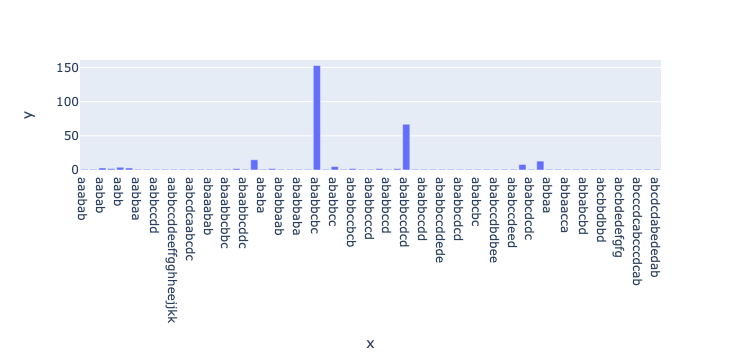

In [126]:
rhyme_counts

In [127]:
def remove_non_alpha_chars(text):
    return re.sub("\W*$", "", text)

In [128]:
df.verse.apply(remove_non_alpha_chars).str.split()

0       [Qui, souhaitez, avoir, tout, le, plaisir]
1       [Qu'un, amy, peult, vouloir, honnestement]
2         [Prenez, exemple, à, mon, chaste, desir]
3         [Et, vous, mirez, en, mon, contentement]
4           [Mais, qui, vouldroit, audacieusement]
                           ...                    
2732        [A, tout, jamais, le, mien, te, donne]
2733    [C’est, bien, disner, quant, on, eschappe]
2734           [Sans, des-bourcer, pas-un, denier]
2735       [Puis, torcher, son, nez, à, la, nappe]
2736              [Et, dirɇ, adieu, au, tavernier]
Name: verse, Length: 2737, dtype: object

In [129]:
df["rhyme_word"] = df.verse.apply(remove_non_alpha_chars).str.split().str.get(-1)

In [130]:
df

,dc_id,rhyme_scheme,meter,stanza_id,line_id,verse,rhyme_word
0,DC0101,ababbcbc,10,1,1,Qui souhaitez avoir tout le plaisir,plaisir
1,DC0101,ababbcbc,10,1,2,Qu'un amy peult vouloir honnestement,honnestement
2,DC0101,ababbcbc,10,1,3,Prenez exemple à mon chaste desir,desir
3,DC0101,ababbcbc,10,1,4,Et vous mirez en mon contentement.,contentement
4,DC0101,ababbcbc,10,2,5,Mais qui vouldroit audacieusement,audacieusement
...,...,...,...,...,...,...,...
2732,DC1616,ababbcbc,8,2,8,A tout jamais le mien te donne.,donne
2733,DC1618,abab,8,1,1,"C’est bien disner quant on eschappe,",eschappe
2734,DC1618,abab,8,1,2,"Sans des-bourcer pas-un denier,",denier
2735,DC1618,abab,8,1,3,"Puis torcher son nez à la nappe,",nappe


In [131]:
rhymes = df.groupby(["dc_id"]).rhyme_word.apply(list).reset_index()
rhymes

,dc_id,rhyme_word
0,DC0101,"[plaisir, honnestement, desir, contentement, a..."
1,DC0102,"[plaist, marchander, demander, desplait, amy, ..."
2,DC0103,"[fortuné, belle, predestiné, d'elle, rebelle, ..."
3,DC0104,"[apparoistre, chasteté, cognoistre, fermeté, a..."
4,DC0105,"[poly, grace, joly, basse, pourchasse, belle, ..."
...,...,...
328,DC1612,"[malheur, allegement, heur, aucunement, doucem..."
329,DC1614,"[cueur, grande, langueur, offrande, cruelle, e..."
330,DC1615,"[cueur, absence, serviteur, naissance, plaisan..."
331,DC1616,"[heureux, l’heure, yeux, demeure, t’asseure, b..."


In [132]:
rhyme_pairs = rhymes.rhyme_word.apply(lambda x: list(combinations(x, 2)))
rhyme_pairs

0      [(plaisir, honnestement), (plaisir, desir), (p...
1      [(plaist, marchander), (plaist, demander), (pl...
2      [(fortuné, belle), (fortuné, predestiné), (for...
3      [(apparoistre, chasteté), (apparoistre, cognoi...
4      [(poly, grace), (poly, joly), (poly, basse), (...
                             ...                        
328    [(malheur, allegement), (malheur, heur), (malh...
329    [(cueur, grande), (cueur, langueur), (cueur, o...
330    [(cueur, absence), (cueur, serviteur), (cueur,...
331    [(heureux, l’heure), (heureux, yeux), (heureux...
332    [(eschappe, denier), (eschappe, nappe), (escha...
Name: rhyme_word, Length: 333, dtype: object

In [133]:
unique_rhyme_pairs = rhyme_pairs.explode().dropna().unique()
unique_rhyme_pairs

array([('plaisir', 'honnestement'), ('plaisir', 'desir'),
       ('plaisir', 'contentement'), ..., ('denier', 'nappe'),
       ('denier', 'tavernier'), ('nappe', 'tavernier')], dtype=object)

In [134]:
pd.Series(unique_rhyme_pairs).isna().sum()

0

In [135]:
def add_communities(G):
    G = deepcopy(G)
    partition = community_louvain.best_partition(G)
    nx.set_node_attributes(G, partition, "group")
    return G

In [136]:
G = nx.Graph()
G.add_edges_from(unique_rhyme_pairs)
G = add_communities(G)

In [138]:
# set display parameters
network_graph = net(notebook=True,
                   width=1000,
                   height=1000,
                   bgcolor="black", 
                   font_color="white")

# Set the physics layout of the network



network_graph.set_options("""
{
"physics": {
"enabled": true,
"forceAtlas2Based": {
    "springLength": 1
},
"solver": "forceAtlas2Based"
}
}
""")

network_graph.from_nx(G)
# # return the network
network_graph.show("network_graph.html")

In [139]:
pyvis_graph = Network(notebook=False, width="1600px", height="900px", bgcolor="black", font_color="white")